In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5969108000162011425,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 31593899008
 locality {
   bus_id: 1
   links {
     link {
       device_id: 1
       type: "StreamExecutor"
       strength: 1
     }
     link {
       device_id: 2
       type: "StreamExecutor"
       strength: 1
     }
     link {
       device_id: 3
       type: "StreamExecutor"
       strength: 1
     }
     link {
       device_id: 4
       type: "StreamExecutor"
       strength: 1
     }
     link {
       device_id: 5
       type: "StreamExecutor"
       strength: 1
     }
     link {
       device_id: 6
       type: "StreamExecutor"
       strength: 1
     }
     link {
       device_id: 7
       type: "StreamExecutor"
       strength: 1
     }
   }
 }
 incarnation: 18244385505913515110
 physical_device_desc: "device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:27:00.0, compute capability: 7.0",
 n

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


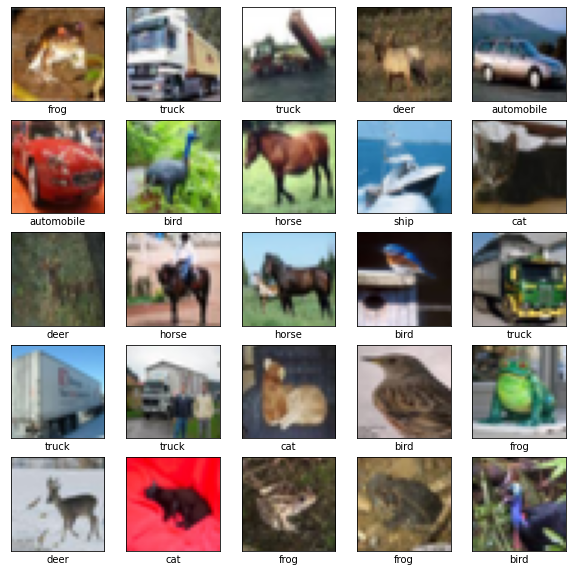

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.7363 - accuracy: 0.3593
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1817 - accuracy: 0.5805
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0074 - accuracy: 0.6439
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8920 - accuracy: 0.6853
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8215 - accuracy: 0.7121
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7524 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7039 - accuracy: 0.7522
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6476 - accuracy: 0.7740
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6031 - accuracy: 0.7907
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.9441 

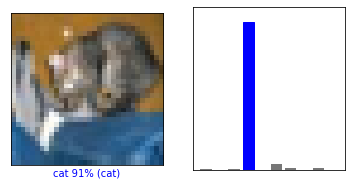

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
 
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
 
 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
 
 
train_images = train_images/255.0
test_images = test_images/255.0
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model.fit(train_images, train_labels, epochs=10)
 
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)
 
predictions = model.predict(test_images)
 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')
 
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()